<a href="https://colab.research.google.com/github/asantone/colab/blob/main/colab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

World Bank International Education Data

In [120]:
#libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests

In [208]:
#Data source:
#Government expenditure on education, total (% of GDP) - United States
#https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart&locations=US

#identify online data source
wb_data_query = "http://api.worldbank.org/v2/en/indicator/SE.XPD.TOTL.GD.ZS?downloadformat=excel"

#pull data from the source
r = requests.get(wb_data_query)

#write the data into a spreadsheet
with open('df.xls', 'wb') as output:
    output.write(r.content)

#read the spreadsheet
main = pd.read_excel('df.xls', sheet_name='Data', skiprows=3, index_col=1)

#filter the data
main_us = main[main['Country Name'] == 'United States']

#pivot wide dataframe to a long dataframe, reset index, drop some rows, drop a column
main_us_long = main_us.unstack().reset_index().drop([0,1,2]).drop('Country Code', axis=1)

#rename columns
main_us_long.columns = ['year', 'value']

#drop any rows with missing values
main_us_long = main_us_long.dropna()

#print a few rows to check the result
main_us_long.head()

,year,value
43,2000,6.085649
44,2001,6.298923
45,2002,6.359955
46,2003,6.328608
47,2004,6.253764


In [209]:
wb_data_query = "http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.GD.ZS?downloadformat=excel"
r = requests.get(wb_data_query)
with open('df.xls', 'wb') as output:
    output.write(r.content)

main_mil = pd.read_excel('df.xls', sheet_name='Data', skiprows=3, index_col=1)
main_mil_us = main_mil[main_mil['Country Name'] == 'United States']
main_mil_us = main_mil_us.unstack().reset_index().drop([0,1,2]).drop('Country Code', axis=1)
main_mil_us["level_0"] = pd.to_numeric(main_mil_us["level_0"])
main_mil_us = main_mil_us[(main_mil_us['level_0'] >= 2000) & (main_mil_us['level_0'] <= 2020)]
main_mil_us.columns = ['year', 'value']
main_mil_us.head()


,year,value
43,2000,3.112242
44,2001,3.12381
45,2002,3.447618
46,2003,3.827161
47,2004,4.016313


In [210]:
#merge two dataframes
df = main_us_long
df.insert(2, "mil", main_mil_us['value'], True)
df.columns = ['year', 'edu', 'mil']
df = df.round(decimals=0).astype(object)
df.head()

,year,edu,mil
43,2000,6.085649,3.112242
44,2001,6.298923,3.12381
45,2002,6.359955,3.447618
46,2003,6.328608,3.827161
47,2004,6.253764,4.016313


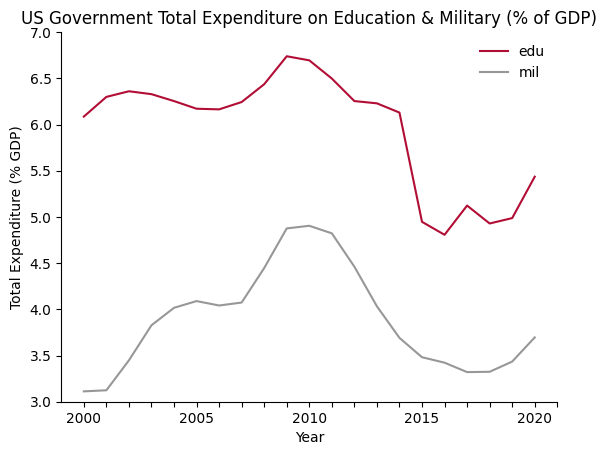

In [211]:
#visualization
#=============

#plot a line chart with a custom color
# Create an axes object
axes = plt.gca()

# pass the axes object to plot function
df.plot(kind='line', x='year', y='edu', ax=axes, color="#B20D35");
df.plot(kind='line', x='year', y='mil', ax=axes, color="#999698");

#update plot styles
#------------------
#reset the text elements
plt.title("US Government Total Expenditure on Education & Military (% of GDP)")
plt.xlabel("Year")
plt.ylabel("Total Expenditure (% GDP)")

#remove the legend
plt.legend(frameon=False)
#plt.gca().get_legend().remove()

#reset ticks and y-axis limit
plt.xticks(np.arange(0, len(main_us_long.loc[:,"year"])+1, 1));
plt.ylim((3, 7));

#remove the border
axes.spines['left'].set_visible(True)
axes.spines['bottom'].set_visible(True)